<a href="https://colab.research.google.com/github/OliviaIntan/IPSD-Assignment/blob/main/Tugas%202/Unguided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('/content/diabetes - diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


## Soal 1

In [ ]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 1. Imputasi dengan mean
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = df.copy()
df_mean_imputed[cols_to_impute] = mean_imputer.fit_transform(df_mean_imputed[cols_to_impute])

# 2. Imputasi dengan median
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = df.copy()
df_median_imputed[cols_to_impute] = median_imputer.fit_transform(df_median_imputed[cols_to_impute])

# 3. Imputasi dengan modus (most frequent)
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode_imputed = df.copy()
df_mode_imputed[cols_to_impute] = mode_imputer.fit_transform(df_mode_imputed[cols_to_impute])

# Menampilkan hasil imputasi dari setiap metode
print("Hasil Imputasi Mean:")
print(df_mean_imputed[cols_to_impute].head())

print("\nHasil Imputasi Median:")
print(df_median_imputed[cols_to_impute].head())

print("\nHasil Imputasi Modus:")
print(df_mode_imputed[cols_to_impute].head())

Hasil Imputasi Mean:
      Glucose  BloodPressure  SkinThickness  Insulin       BMI
0  120.462481           72.0           35.0      0.0  31.99368
1   85.000000           66.0           29.0      0.0  31.99368
2  183.000000           64.0            0.0      0.0  23.30000
3   89.000000           66.0           23.0     94.0  28.10000
4  120.462481           40.0           35.0    168.0  43.10000

Hasil Imputasi Median:
   Glucose  BloodPressure  SkinThickness  Insulin    BMI
0    116.0           72.0           35.0      0.0  32.15
1     85.0           66.0           29.0      0.0  32.15
2    183.0           64.0            0.0      0.0  23.30
3     89.0           66.0           23.0     94.0  28.10
4    116.0           40.0           35.0    168.0  43.10

Hasil Imputasi Modus:
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    100.0           72.0           35.0      0.0  31.2
1     85.0           66.0           29.0      0.0  31.2
2    183.0           64.0            0.0    

## Soal 2

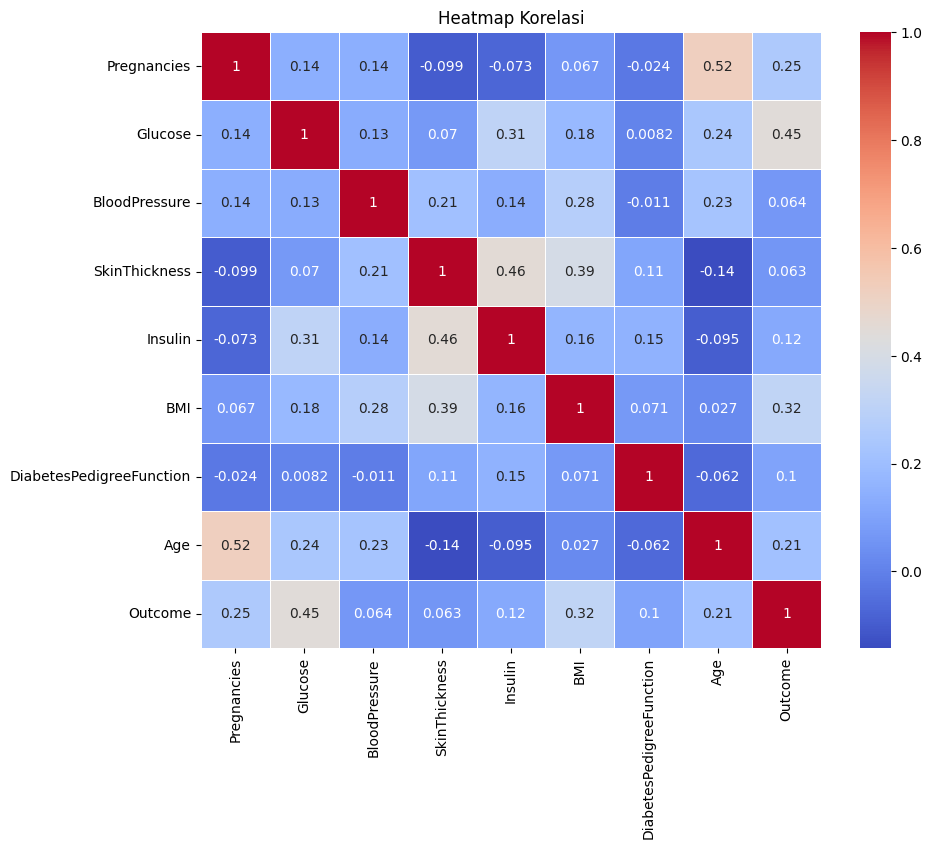

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## Soal 3

In [15]:
# Mengambil fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Melakukan undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Menampilkan distribusi kelas dalam y_resampled
print("Distribusi kelas setelah undersampling:")
print(y_resampled.value_counts())

Distribusi kelas setelah undersampling:
Outcome
0    268
1    268
Name: count, dtype: int64


## Soal 4

In [ ]:
# Pertama-tama bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [18]:
# Scaling dengan Robust Scaler untuk mengatasi outliers
scaler_robust = RobustScaler()
X_robust_scaled = scaler_robust.fit_transform(X_res)

# Scaling ulang dengan MinMax Scaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X_robust_scaled)

# Mengubah kembali menjadi DataFrame
df_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Menampilkan data yang telah di scale
print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040       NaN       NaN   
1     0.294118       NaN       0.421053       0.000000  0.000000  0.502235   
2     0.176471  0.557789       0.508772       0.313131  0.081031  0.439642   
3     0.117647  0.648241       0.736842       0.000000  0.000000  0.417288   
4     0.411765  0.512563       0.649123       0.404040       NaN  0.554396   

   DiabetesPedigreeFunction       Age  
0                  0.225127  0.176471  
1                  0.675586  0.078431  
2                  0.000341  0.019608  
3                  0.293315  0.117647  
4                  0.210662       NaN  


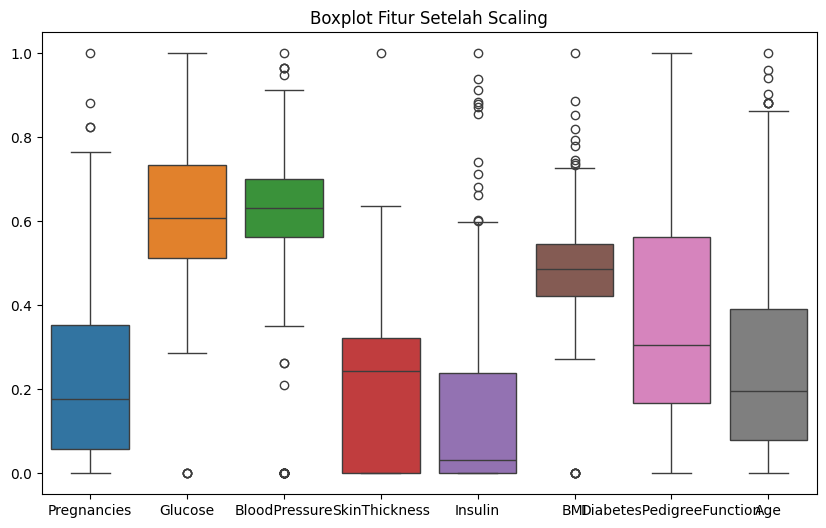

In [23]:
# Visualisasi data yang telah diskalakan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled)
plt.title('Boxplot Fitur Setelah Scaling')
plt.show()